<img src="../../img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">Thresholding images obtained through STAC</span>
<hr style="border:2px solid #0077b9;">

If you haven't installed the [STAC client for Python](https://github.com/brazil-data-cube/stac.py), install it with `pip`:

In [ ]:
!pip install stac.py

For more information on [STAC client for Python](https://github.com/brazil-data-cube/stac.py), see the introductory Jupyter Notebook about the [SpatioTemporal Asset Catalog (STAC)](./stac-introduction.ipynb).

# 1. Load the following Libraries
<hr style="border:1px solid #0077b9;">

In [21]:
import numpy
import rasterio
import stac

from matplotlib import pyplot as plt
from rasterio.windows import Window

# 2. Set the service and search for images
<hr style="border:1px solid #0077b9;">

In [22]:
st = stac.STAC('https://brazildatacube.dpi.inpe.br/stac/', access_token='XXXXXXX')

In [23]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-54.0,-24.0,-53.0,-23.0',
                       'datetime':'2018-08-01/2019-07-31', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16


In [24]:
ndvi_band_info = my_search['features'][0]['properties']['eo:bands'][7]
ndvi_band_info

{'name': 'BAND14',
 'common_name': 'green',
 'description': None,
 'min': 0.0,
 'max': 10000.0,
 'nodata': -9999.0,
 'scale': 0.0001,
 'center_wavelength': 0.555,
 'full_width_half_max': 0.035,
 'data_type': 'int16'}

In [25]:
ndvi_url = my_search['features'][0]['assets']['NDVI']['href']
ndvi_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_NDVI.tif'

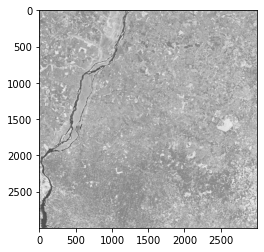

In [26]:
with rasterio.open(ndvi_url) as dataset:
    ndvi = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(ndvi, cmap='gray')

In [27]:
ndvi

array([[6424, 6559, 6629, ..., 4105, 4153, 4211],
       [6330, 6393, 6585, ..., 5390, 5836, 6435],
       [6225, 6141, 5618, ..., 6844, 7095, 7082],
       ...,
       [5408, 5825, 6581, ..., 3927, 3874, 3655],
       [5903, 5867, 6131, ..., 4481, 4515, 4204],
       [6458, 5885, 5590, ..., 4654, 4286, 4153]], dtype=int16)

# 3. Calculate Image histogram
<hr style="border:1px solid #0077b9;">

Text(0.5, 1.0, 'Histogram with 5 bins')

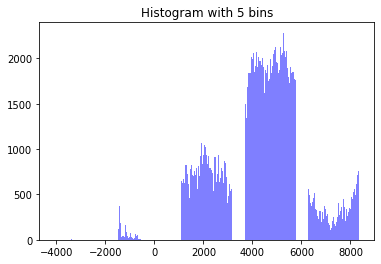

In [28]:
num_bins = 5
plt.hist(ndvi, bins=num_bins, facecolor='blue', alpha=0.5) # arguments are passed to np.histogram
plt.title(f"Histogram with {num_bins} bins")

In [29]:
label_img = numpy.copy(ndvi)

In [30]:
ndvi

array([[6424, 6559, 6629, ..., 4105, 4153, 4211],
       [6330, 6393, 6585, ..., 5390, 5836, 6435],
       [6225, 6141, 5618, ..., 6844, 7095, 7082],
       ...,
       [5408, 5825, 6581, ..., 3927, 3874, 3655],
       [5903, 5867, 6131, ..., 4481, 4515, 4204],
       [6458, 5885, 5590, ..., 4654, 4286, 4153]], dtype=int16)

# 4. Set thresholds
<hr style="border:1px solid #0077b9;">

In [31]:
label_img[ndvi < 2000] = 1 # < 0.2 #water
label_img[ndvi >= 2000] = 2 # < 0.2 #other uses

In [32]:
label_img[ndvi < 2000] = 1 # < 0.2 #water
label_img[ndvi >= 2000] = 2 # < 0.2 #other uses
label_img[ndvi >= 6500] = 3 # > 0.65 #dense vegetation
label_img

array([[2, 3, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int16)

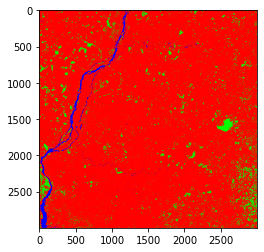

In [33]:
plt.imshow(label_img, cmap='brg')
plt.show()